In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_rows', None)
train_data_path = 'titanic/train.csv'
test_data_path = 'titanic/test.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

### Light Data Exploration

In [6]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
train_num = train_df.select_dtypes(include=[np.number])
train_cat = train_df[["Survived", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]]

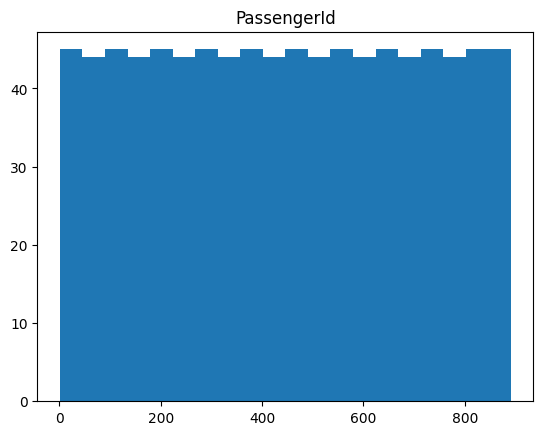

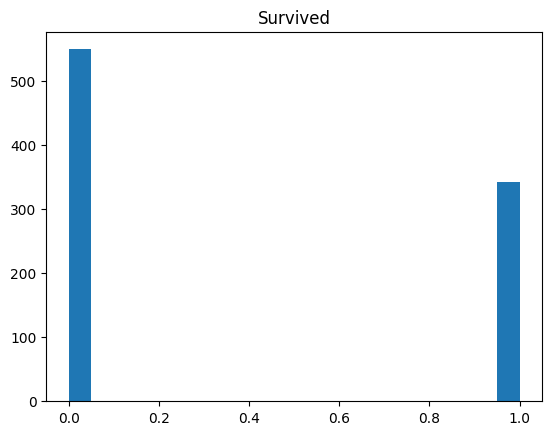

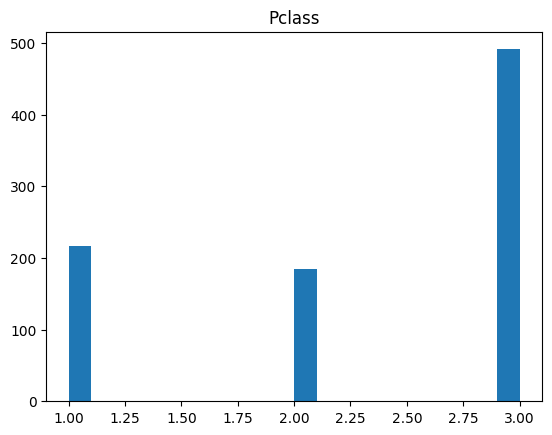

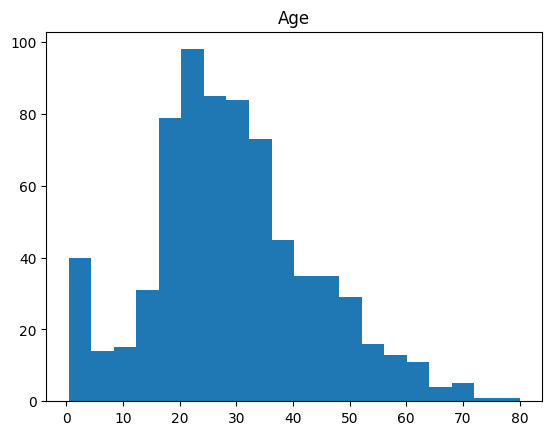

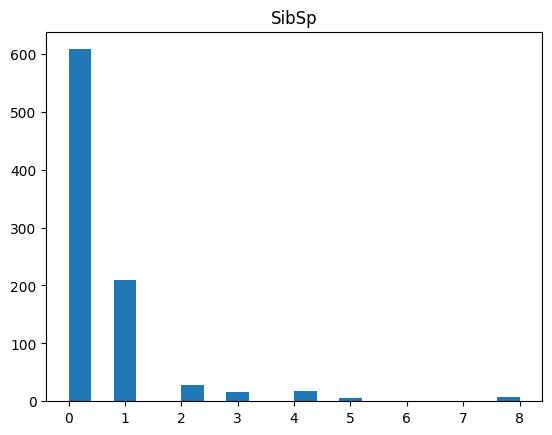

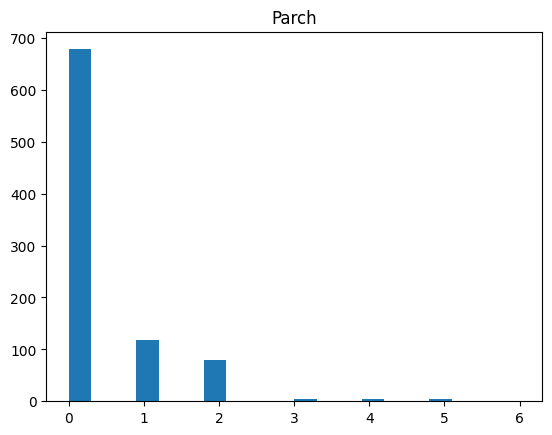

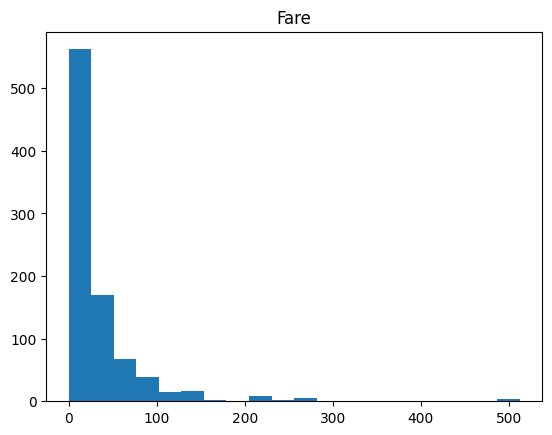

In [14]:
for i in train_num.columns:
    plt.hist(train_num[i], bins=20)
    plt.title(i)
    plt.show()

<Axes: >

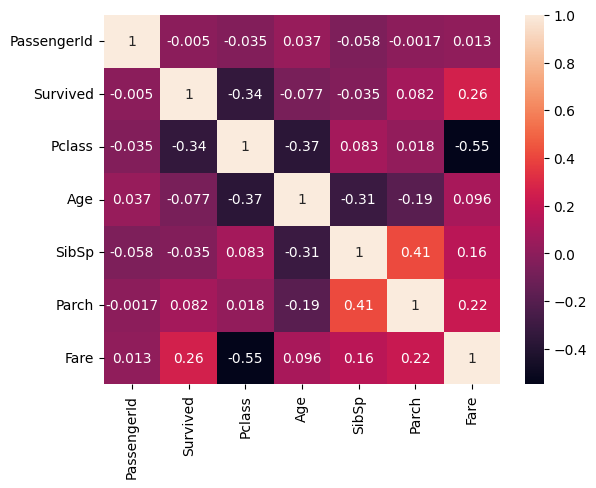

In [24]:
sns.heatmap(train_num.corr(), annot=True)

In [32]:
pd.pivot_table(train_df, index='Survived', values=['Age', 'Fare', 'Parch', 'SibSp'])
train_cat.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


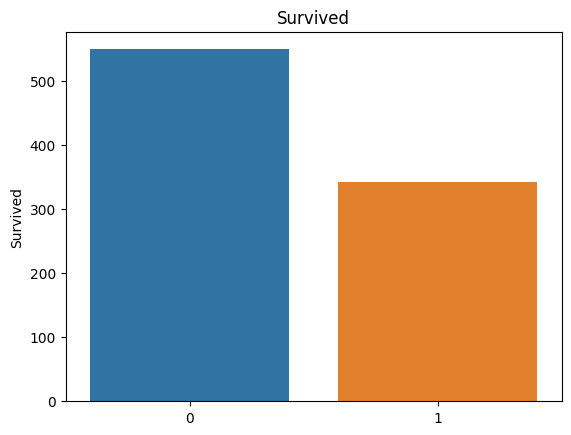

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


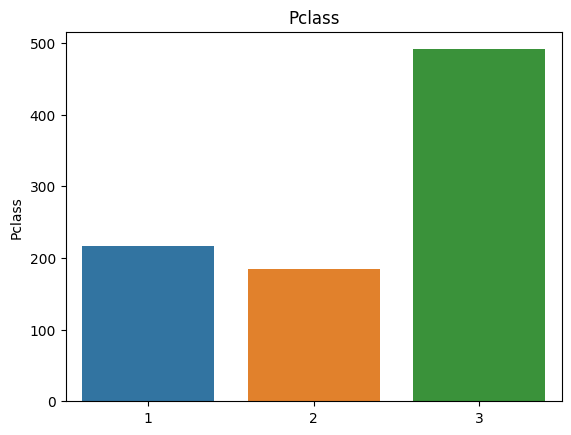

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


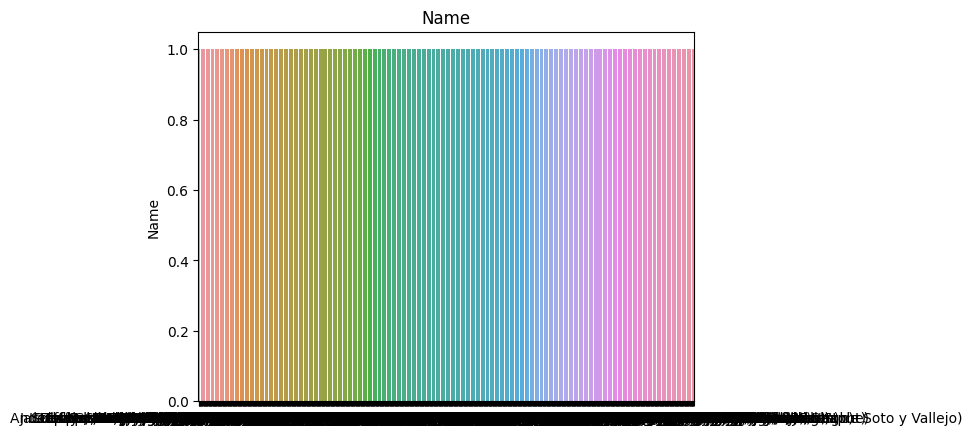

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


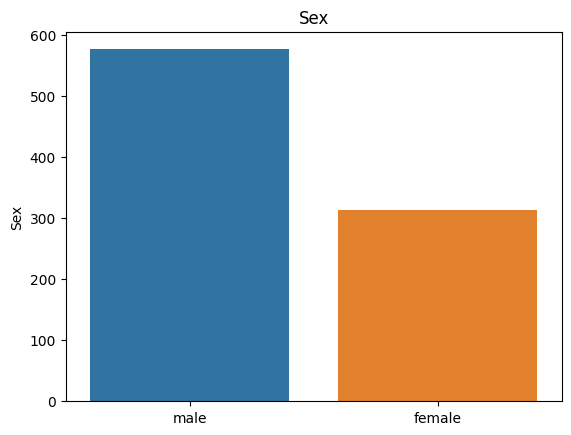

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


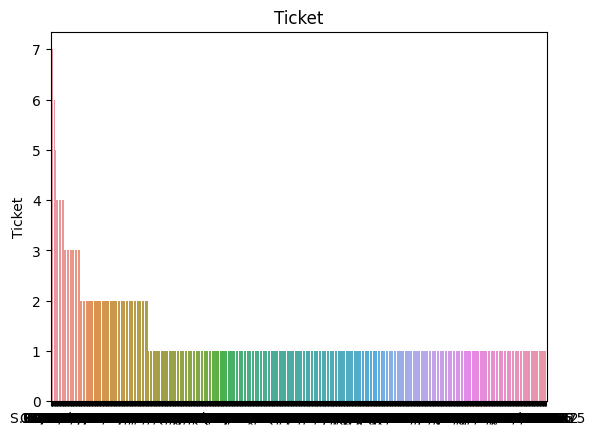

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


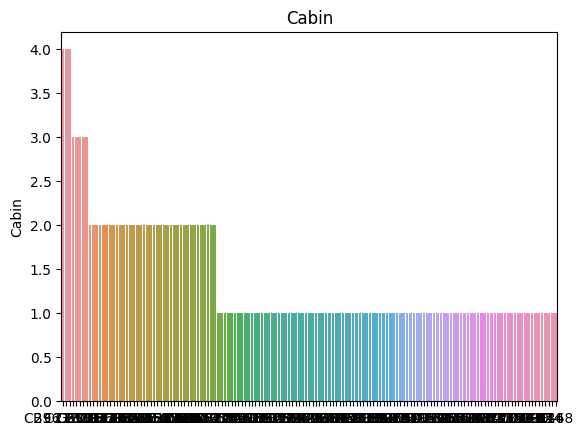

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


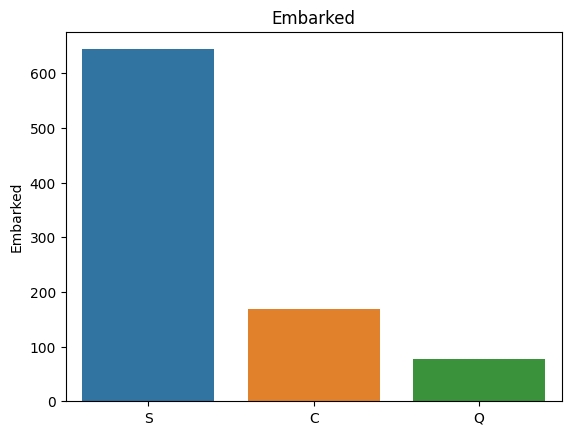

In [43]:
for i in train_cat.columns:
    sns.barplot(train_cat[i].value_counts().index, train_cat[i].value_counts())
    plt.title(i)
    plt.show()

In [57]:
print(pd.pivot_table(train_df, index='Survived', columns='Pclass', values='Name', aggfunc='count'))
print('----------------------')
print(pd.pivot_table(train_df, index='Survived', columns='Sex', values='Name', aggfunc='count'))
print('----------------------')
print(pd.pivot_table(train_df, index='Survived', columns='Embarked', values='Name', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------
Sex       female  male
Survived              
0             81   468
1            233   109
----------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


### Feature Engineering

In [8]:
train_df['train_test'] = 'train'
test_df['train_test'] = 'test'
all_data = pd.concat([train_df,test_df])
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_multiple'].value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: cabin_multiple, dtype: int64

In [9]:
pd.pivot_table(all_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc ='count' )

cabin_multiple,0,1,2,3,4
Survived,,,,,
0.0,481.0,58.0,7.0,3.0,NaN
1.0,206.0,122.0,9.0,3.0,2.0


In [10]:
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
pd.pivot_table(all_data, index = 'Survived', columns = 'cabin_adv', values = 'Ticket', aggfunc ='count' )

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [11]:
all_data.Ticket.value_counts()
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)


In [12]:
all_data["name_title"] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data["name_title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: name_title, dtype: int64

### Data Pre-Processing

In [13]:
all_data.Age.fillna(all_data.Age.mean(), inplace=True)
all_data['Age'] = all_data.Age.apply(lambda x: int(x))
all_data.Fare.fillna(all_data.Fare.median(), inplace=True)
all_data.dropna(subset=['Embarked'], inplace=True)

<Axes: >

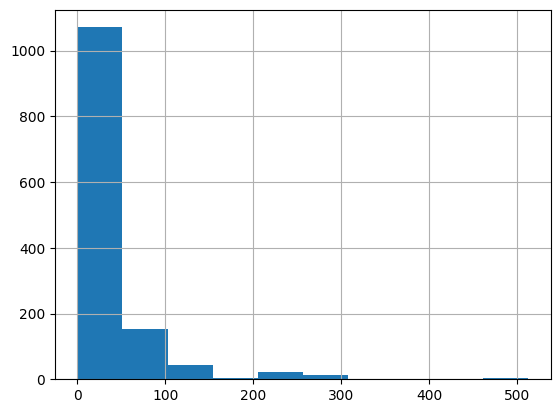

In [14]:
# Normalize the fare data
all_data.Fare.hist(bins=10)

<Axes: >

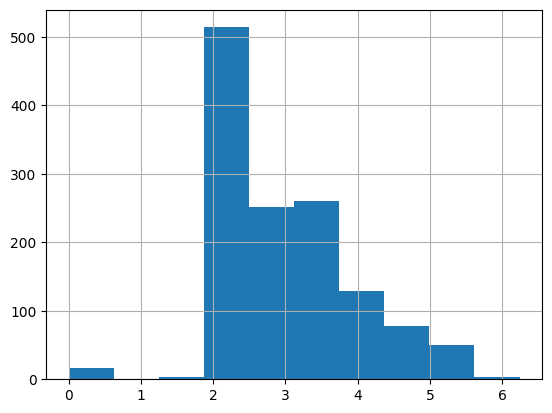

In [15]:
all_data['norm_fare'] = np.log(all_data.Fare + 1)
all_data['norm_fare'].hist(bins=10)

In [16]:
all_data.Pclass = all_data.Pclass.astype(str)

In [17]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

In [18]:
#Split to train test again
X_train = all_dummies[all_dummies['train_test_train'] == 1 ]
X_test = all_dummies[all_dummies['train_test_test'] == 1 ]
print("len(X_train)", len(X_train))
print("len(X_test)", len(X_test))
# X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
# X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)
X_test.drop(['train_test_test'], axis =1, inplace=True)
X_test.drop(['train_test_train'], axis =1, inplace=True)
X_train.drop(['train_test_test'], axis =1, inplace=True)
X_train.drop(['train_test_train'], axis =1, inplace=True)

y_train = all_data[all_dummies.train_test_train == 1].Survived
y_train.shape

len(X_train) 889
len(X_test) 418


/var/folders/7y/nd2lqd_91z9d50n6nqz2l3140000gn/T/ipykernel_78338/46039757.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['train_test_test'], axis =1, inplace=True)
/var/folders/7y/nd2lqd_91z9d50n6nqz2l3140000gn/T/ipykernel_78338/46039757.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['train_test_train'], axis =1, inplace=True)
/var/folders/7y/nd2lqd_91z9d50n6nqz2l3140000gn/T/ipykernel_78338/46039757.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

(889,)

### Model Building

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# import xgboost
from sklearn.ensemble import GradientBoostingClassifier
# import lightgbm
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb


In [20]:
gnb = GaussianNB()
cross_val = cross_val_score(gnb, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.66853933 0.70224719 0.76966292 0.75842697 0.72881356]
0.7255379927632831


In [21]:
log_r = LogisticRegression(max_iter=2000)
cross_val = cross_val_score(log_r, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [22]:
tree = tree.DecisionTreeClassifier()
cross_val = cross_val_score(tree, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.76404494 0.76966292 0.82022472 0.76966292 0.83050847]
0.7908207960388498


In [23]:
k_nn = KNeighborsClassifier()
cross_val = cross_val_score(k_nn, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.75842697 0.80337079 0.80898876 0.82022472 0.84180791]
0.8065638291119152


In [24]:
rand_f = RandomForestClassifier()
cross_val = cross_val_score(rand_f, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.8258427  0.78651685 0.85955056 0.75280899 0.84180791]
0.813305402145623


In [31]:
svc = SVC(probability=True)
cross_val = cross_val_score(svc, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.68539326 0.76966292 0.71348315 0.71910112 0.74011299]
0.7255506887576969


In [26]:
gbc = GradientBoostingClassifier()
cross_val = cross_val_score(gbc, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.82022472 0.80337079 0.85393258 0.79213483 0.85875706]
0.8256839966990415


In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
cross_val = cross_val_score(xgb, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.80337079 0.83707865 0.86516854 0.80898876 0.79096045]
0.821113438710087


In [33]:
vc = VotingClassifier(estimators = [('gnb', gnb), ('log_r', log_r), ('tree', tree), ('k_nn', k_nn), ('rand_f', rand_f), ('svc', svc), ('gbc', gbc), ('xgb',xgb)], voting='soft')
cv = cross_val_score(vc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.81460674 0.82022472 0.83146067 0.81460674 0.86440678]
0.8290611312131023


### Model Tuning

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [38]:
lr = LogisticRegression(max_iter=2000)
param_grid = {
    'max_iter': [1000, 2000],
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

clf_lr = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/j

Logistic Regression
Best Score: 0.8268075922046594
Best Parameters: {'C': 1.623776739188721, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jacobbaum/Library/Caches/pypoetry/virtualenvs/kaggle-titanic-4Wioje-j-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [39]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8076747286231194
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [46]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1],
                                  'C': [1]},
                                 {'kernel': ['poly'], 'degree' : [2], 'C': [1]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')


Fitting 5 folds for each of 2 candidates, totalling 10 fits
SVC
Best Score: 0.8076810766203263
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [52]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [20, 25],
                                  'max_features': ['log2', 'sqrt', 10],
                                  'min_samples_leaf': [2],
                                  'min_samples_split': [2]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest
Best Score: 0.8335491652383672
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}


<Axes: >

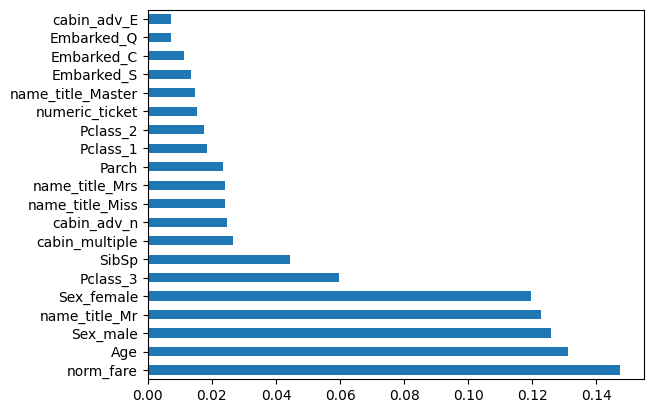

In [57]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    model = XGBClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    model = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# Run Optuna for XGBoost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=20)
print("Best XGB params:", study_xgb.best_params)
print("Best XGB score:", study_xgb.best_value)

# Run Optuna for RandomForest
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=20)
print("Best RF params:", study_rf.best_params)
print("Best RF score:", study_rf.best_value)